### Problem Statement

#### The problem is to predict employee attrition. This is a fictional data set created by IBM data scientists. The dataset is taken from the below link:

### https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

### Objective : 

#### Attrition of employees if not predicted correctly can lead to losing valuable people, resulting in reduced efficiency of the organisation, reduced morale among team members etc

#### Hence it is necessary to correctly predict which employee is likely to leave, ie reduce the number of False Negatives. 

#### In other words, our objective in this case would be to increase Recall (TP/(TP+FN))

### Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import Counter
import time
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
train=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

### Data Exploration

In [3]:
train.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [5]:
train.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
train.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### Correlation Heatmap

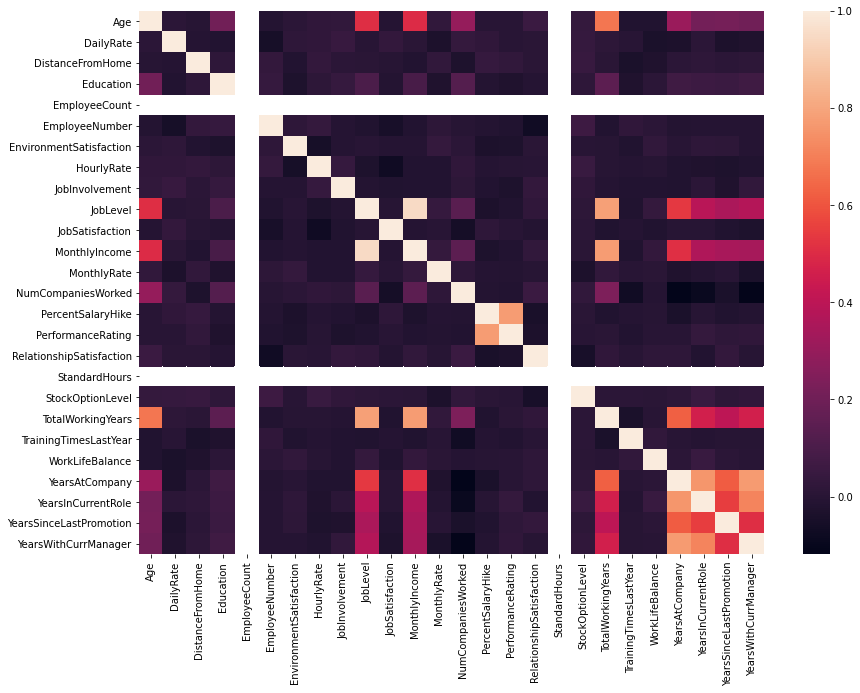

In [7]:
plt.figure(figsize=(14,10))
sns.heatmap(train.corr(),yticklabels=True,cbar=True,linewidths=0)
plt.show()

#### EmployeeCount and StandardHours are columns with constant values

In [8]:
train.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


In [9]:
corr1 = train.corr().abs()
corr1[corr1 == 1] = 0
corr_cols = corr1.unstack().sort_values(ascending=False).drop_duplicates()

corr_df = pd.DataFrame(corr_cols[corr_cols > 0.75])
corr_df

,,0
MonthlyIncome,JobLevel,0.950300
TotalWorkingYears,JobLevel,0.782208
PercentSalaryHike,PerformanceRating,0.773550
TotalWorkingYears,MonthlyIncome,0.772893
YearsWithCurrManager,YearsAtCompany,0.769212
YearsInCurrentRole,YearsAtCompany,0.758754


#### There is a severe correlation of data. However dropping columns might lead to loss of data.

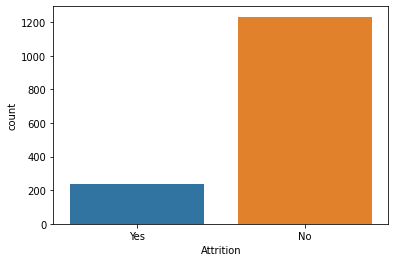

In [10]:
sns.countplot(train['Attrition'])
plt.show()

### Categorical Data

In [11]:
categoricals = train.select_dtypes(exclude=[np.number])
print(categoricals.dtypes)
categoricals.describe()

Attrition         object
BusinessTravel    object
Department        object
EducationField    object
Gender            object
JobRole           object
MaritalStatus     object
Over18            object
OverTime          object
dtype: object


,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


#### There are 9 categorical variables. We have to create dummy variables of the same.

In [12]:
BusinessTravel = pd.get_dummies(train['BusinessTravel'],drop_first=True)

In [13]:
Department = pd.get_dummies(train['Department'],drop_first=True)

In [14]:
EducationField = pd.get_dummies(train['EducationField'],drop_first=True)

In [15]:
Gender = pd.get_dummies(train['Gender'],drop_first=True)

In [16]:
JobRole = pd.get_dummies(train['JobRole'],drop_first=True)

In [17]:
MaritalStatus = pd.get_dummies(train['MaritalStatus'],drop_first=True)

In [18]:
#Function t convert Yes and No to integer values 1 and 0 respectively
def StrToBin(a):
    if (a == 'Yes' or a== 'Y'):
        return 1
    else:
        return 0

In [19]:
train['Attrition']=train['Attrition'].apply(StrToBin)

In [20]:
train['OverTime']=train['OverTime'].apply(StrToBin)

In [21]:
train['Over18']=train['Over18'].apply(StrToBin)

In [22]:
#Dropping unnecessary variables
train.drop(['Department','EducationField','Gender','BusinessTravel','JobRole','MaritalStatus'],axis=1,inplace=True)

In [23]:
#Concatenating split data into one
train = pd.concat([train,Department,EducationField,Gender,BusinessTravel,JobRole,MaritalStatus],axis=1)

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 49 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null int64
DailyRate                   1470 non-null int64
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobSatisfaction             1470 non-null int64
MonthlyIncome               1470 non-null int64
MonthlyRate                 1470 non-null int64
NumCompaniesWorked          1470 non-null int64
Over18                      1470 non-null int64
OverTime                    1470 non-null int64
PercentSalaryHike           1470 non-null int64
PerformanceRating           1

In [25]:
train.drop("StandardHours", axis=1, inplace=True)
train.drop("EmployeeCount", axis=1, inplace=True)
#These columns has same value throughout

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 47 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null int64
DailyRate                   1470 non-null int64
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobSatisfaction             1470 non-null int64
MonthlyIncome               1470 non-null int64
MonthlyRate                 1470 non-null int64
NumCompaniesWorked          1470 non-null int64
Over18                      1470 non-null int64
OverTime                    1470 non-null int64
PercentSalaryHike           1470 non-null int64
PerformanceRating           1470 non-null int64
RelationshipSatisfaction    1

In [27]:
m = list(train.columns)
n = list(filter(lambda t: t not in ['Attrition'], m))

In [28]:
X = train[n]
y = train['Attrition']

## KNN - Base Model

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state = 0)

In [30]:
sc1 = StandardScaler()
X_train_sc = sc1.fit_transform(X_train)
X_test_sc = sc1.transform(X_test)

### Calculating value of n_neighbors at which error is minimum

In [31]:
test_error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i,algorithm='brute', weights='distance')
    knn.fit(X_train_sc,y_train)
    pred_test_i = knn.predict(X_test_sc)
    test_error_rate.append(np.mean(pred_test_i != y_test))

Text(0, 0.5, 'Error Rate')

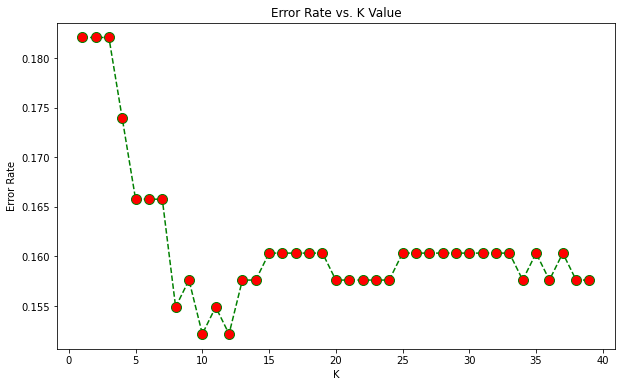

In [32]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),test_error_rate,color='green', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

#### Error seems minimum at K=10

In [33]:
knn = KNeighborsClassifier(n_neighbors=10,weights='distance',algorithm='auto', p=3)
start_time = time.time()
knn.fit(X_train_sc,y_train)
end_time = time.time()
time_knn = end_time-start_time
print(time_knn)

0.004853010177612305


In [34]:
pred = knn.predict(X_test_sc)

In [35]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[306   3]
 [ 56   3]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       309
           1       0.50      0.05      0.09        59

    accuracy                           0.84       368
   macro avg       0.67      0.52      0.50       368
weighted avg       0.79      0.84      0.78       368



#### Recall is very poor using KNN

In [36]:
print(accuracy_score(y_test, pred))

0.8396739130434783


### LDA - Base Model (As a classification model)

In [37]:
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [38]:
sc2 = StandardScaler()
X_train_clf = sc2.fit_transform(X_train_clf)
X_test_clf = sc2.transform(X_test_clf)

In [39]:
lda_0 = LDA()
lda_0.fit(X_train_sc, y_train)
y_test_pred_0 = lda_0.predict(X_test_sc)

In [40]:
print(confusion_matrix(y_test, y_test_pred_0))
print(classification_report(y_test, y_test_pred_0))

[[300   9]
 [ 38  21]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       309
           1       0.70      0.36      0.47        59

    accuracy                           0.87       368
   macro avg       0.79      0.66      0.70       368
weighted avg       0.86      0.87      0.85       368



#### Recall has improved to 0.36 using LDA

In [41]:
print(accuracy_score(y_test_pred_0, y_test))

0.8722826086956522


### KNN + LDA (Using LDA to transform the data and then using KNN)

In [42]:
X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split(X, y, test_size = 0.25, stratify=y, random_state = 0)

In [43]:
#Transformation by LDA
lda_1 = LDA(n_components = 1, solver='eigen', shrinkage='auto')
X_train_lda = lda_1.fit_transform(X_train_lda, y_train_lda)
X_test_lda = lda_1.transform(X_test_lda)

In [44]:
sc3 = StandardScaler()
X_train_lda_sc = sc3.fit_transform(X_train_lda)
X_test_lda_sc = sc3.transform(X_test_lda)

In [45]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_lda_sc,y_train_lda)
    pred_i = knn.predict(X_test_lda_sc)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

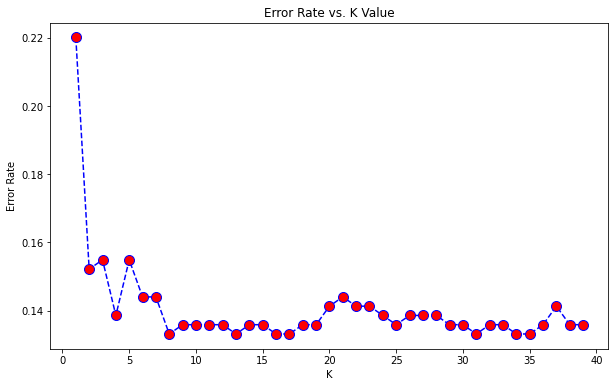

In [46]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [56]:
knn = KNeighborsClassifier(n_neighbors=8,weights='distance',algorithm='auto', p=3)
start_time = time.time()
knn.fit(X_train_lda_sc,y_train_lda)
end_time = time.time()
time_lda = end_time-start_time
print(time_lda)

0.0024199485778808594


In [57]:
pred = knn.predict(X_test_lda_sc)

In [58]:
print(confusion_matrix(y_test_lda,pred))
print(classification_report(y_test_lda,pred))

[[283  26]
 [ 34  25]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       309
           1       0.49      0.42      0.45        59

    accuracy                           0.84       368
   macro avg       0.69      0.67      0.68       368
weighted avg       0.83      0.84      0.83       368



#### There is a 6% improvement in the recall after using LDA

In [50]:
print(accuracy_score(y_test, pred))

0.8369565217391305


### Computing time difference between two different logistic regression models created

In [59]:
time_difference = time_lda/time_knn
#Time difference between knn and knn+lda

In [60]:
print(time_difference)

0.49864898059444857


#### KNN+LDA takes half the time to run as compared to KNN